In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Churn_Modelling Dataset2.csv")

In [ ]:
df=data.head(10)

Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

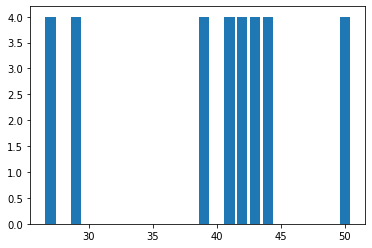

In [ ]:
plt.bar (df['Age'],4)

Bivariate Analysis

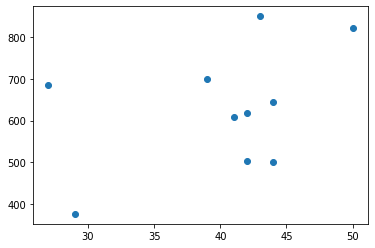

In [ ]:
plt.scatter(df['Age'],df['CreditScore'])

Multivariate analysis

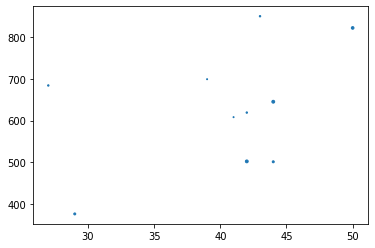

In [ ]:
plt.scatter(df['Age'],df['CreditScore'],df['Tenure'])

Descriptive statistics on the dataset

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handling Missing values

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Find the outliers and replace the outliers

Finding Outliners

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


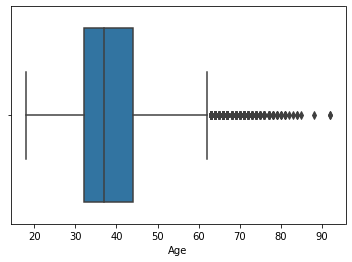

In [ ]:
sns.boxplot(data['Age'])

Replacing outliners

In [ ]:
q=data.quantile(q=[0.75,0.5])

In [ ]:
iqr=q.iloc[0]-q.iloc[1]

In [ ]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [ ]:
l=q.iloc[1]-(1.5*iqr)

In [ ]:
l['Age']

26.5

In [ ]:
u=q.iloc[1]+(1.5*iqr)

In [ ]:
u['Age']

47.5

In [ ]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


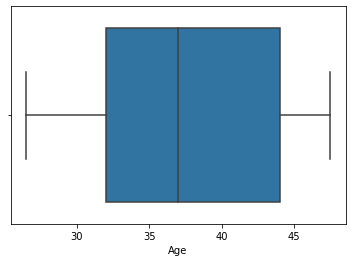

In [ ]:
sns.boxplot(data['Age'])

Check for Categorical columns and perform encoding.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10 non-null     int64  
 1   CustomerId       10 non-null     int64  
 2   Surname          10 non-null     object 
 3   CreditScore      10 non-null     int64  
 4   Geography        10 non-null     object 
 5   Gender           10 non-null     object 
 6   Age              10 non-null     int64  
 7   Tenure           10 non-null     int64  
 8   Balance          10 non-null     float64
 9   NumOfProducts    10 non-null     int64  
 10  HasCrCard        10 non-null     int64  
 11  IsActiveMember   10 non-null     int64  
 12  EstimatedSalary  10 non-null     float64
 13  Exited           10 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [ ]:
le=LabelEncoder()

In [ ]:
data['Surname']=le.fit_transform(data['Surname'])

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [ ]:
data['Geography']=le.fit_transform(data['Geography'])

In [ ]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42.0,3,75075.31,2,1,0,92888.52,1


Split the data into dependent and independent variables.

Independent Variables

In [ ]:
x=data.iloc[:,0:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35.0,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36.0,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42.0,3,75075.31,2,1,0,92888.52


Dependent Variables

In [ ]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Scale the independent variables

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
scale(x)

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
334,335,15742668,683,626,2,1,37.0,6,108269.37,1,1,0,5597.94
9849,9850,15776211,2628,678,0,1,34.0,6,0.00,2,1,1,124592.84
9345,9346,15758048,1794,582,0,0,47.5,2,148942.00,1,1,1,116944.30
6423,6424,15600720,1839,652,2,0,41.0,8,115144.68,1,1,0,188905.43
4179,4180,15668580,2617,716,2,0,33.0,2,0.00,2,1,1,92916.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7821,7822,15686588,1667,777,0,1,28.0,2,134571.50,1,0,1,118313.38
9305,9306,15598046,2541,662,0,1,39.0,5,139562.05,2,1,0,61636.22
3941,3942,15603170,1361,654,0,0,32.0,9,121455.65,1,1,0,190068.53
6957,6958,15802274,2773,686,0,1,44.0,7,55053.62,1,1,0,181757.19


In [ ]:
x_train.shape

(8000, 13)

In [ ]:
y_train

334     0
9849    0
9345    0
6423    0
4179    0
       ..
7821    0
9305    0
3941    1
6957    0
7118    0
Name: Exited, Length: 8000, dtype: int64

In [ ]:
y_train.shape

(8000,)

In [ ]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6354,6355,15566312,1337,660,2,1,42.0,5,0.00,3,1,1,189016.24
5427,5428,15674149,824,599,1,0,36.0,3,128960.21,2,1,1,40318.33
669,670,15662397,2470,640,0,1,42.0,5,176099.13,1,1,1,8404.73
2661,2662,15688409,737,742,0,1,28.0,2,191864.51,1,1,0,108457.99
1608,1609,15801466,1051,574,0,1,39.0,2,122524.61,2,1,0,88463.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,1409,15579062,537,707,0,0,32.0,9,0.00,2,0,0,30807.02
1616,1617,15665695,2202,594,0,1,47.5,4,0.00,2,1,1,23631.55
4934,4935,15806913,257,670,0,1,47.5,2,95507.12,1,1,1,63213.31
7309,7310,15793317,1087,547,2,1,26.5,7,141287.15,1,1,0,118142.79


In [ ]:
x_test.shape

(2000, 13)

In [ ]:
y_test

6354    1
5427    0
669     0
2661    1
1608    0
       ..
1408    0
1616    0
4934    0
7309    0
1590    0
Name: Exited, Length: 2000, dtype: int64

In [ ]:
y_test.shape

(2000,)